### Lead Scoring Case Study

#### Reading and Understanding the Dataset

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Setting the columns and rows view limit
pd.options.display.max_columns= None
pd.options.display.max_rows= 150

In [2]:
# Reading the Dataset
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Analysing and understand the Dataset
df.shape

(9240, 37)

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are multiple categorical variables present in the dataset. So, we need to create dummy variables. And also, there are lot of null values present in the dataset. We need to handle them as well.

#### Data Cleaning and Preparation

In [6]:
# Checking the number of missing values per column
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Checking the percentage missing values
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

So, there are multiple columns with missing values. But, we can remove columns which are having missing value percentage greater than 30% since the columns are not significant for the analysis.

In [8]:
# Removing the columns with missing value percent > 30.
for col in df.columns:
    if (df[col].isnull().sum()/df.shape[0])*100 > 30:
        df.drop(col,1,inplace=True)

In [9]:
# Verifying
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

So, all the columns with null values > 30% have been removed.
Let us remove the columns Country and City which are not much significant to the analysis.

In [10]:
# Removing Country and City columns.
df.drop(['Country'],axis=1,inplace=True)
df.drop(['City'],axis=1,inplace=True)

In [11]:
df.shape

(9240, 29)

By the problem statement, there are columns with value 'Select' which means, the user has not selected any option for that particular variable and is as good as missing values. So we need to identify these columns.

In [12]:
# Checking the value counts of the columns
for col in df:
    print(df[col].astype('category').value_counts())

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

By observing the above result, we found that the columns 'Lead Profile', 'How did you hear about X Education' and 'Specialization' have the value 'Select'. Let us check them once again.

In [13]:
df['Lead Profile'].value_counts(normalize=True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

In [14]:
df['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [15]:
df['Specialization'].value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

Clearly, for the columns 'Lead Profile' and 'How did you hear about X Education', the percentage of 'Select' column is greater than 60% and hence it is of no use. So, let us drop these 2 columns.

In [16]:
# Dropping 'Lead Profile' and 'How did you hear about X Education' columns.
df.drop(['Lead Profile', 'How did you hear about X Education'],axis=1, inplace=True)

In [17]:
# Verifying
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


Also, from the value counts observation it is found that there are columns for which only one value is present majorly. The columns are 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'. Since almost all the values of this columns are 'NO', it is better to drop these columns and proceed with the Analysis.

In [18]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1, inplace=True)

Similarly, for the column 'What matters most to you in choosing a course' has majorly one value compared to others. So it is better to drop this column as well.

In [19]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
# Dropping 'What matters most to you in chossing a course' column.
df.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [21]:
df.shape

(9240, 14)

In [22]:
# Analysing the Null values agian
df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Since there are still multiple columns with null values, it is better to remove the rows with the null values and carry out the analysis.

In [23]:
# Dropping the Rows with null values
df = df[~pd.isnull(df['Lead Source'])]

In [24]:
df = df[~pd.isnull(df['TotalVisits'])]

In [25]:
df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [26]:
df = df[~pd.isnull(df['Specialization'])]

In [27]:
df = df[~pd.isnull(df['What is your current occupation'])]

In [28]:
df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [29]:
df.shape

(6373, 14)

In [30]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


So, we handled the null values and got the cleaned Dataset. So it is clear from the observation that the columns 'Prospect ID' and 'Lead Number' will not be of any use for the analysis. So, it is better to remove those columns.

In [31]:
# Removing 'Prospect ID' and 'Lead Number' columns.
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [32]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


#### Exploratory Data Analysis

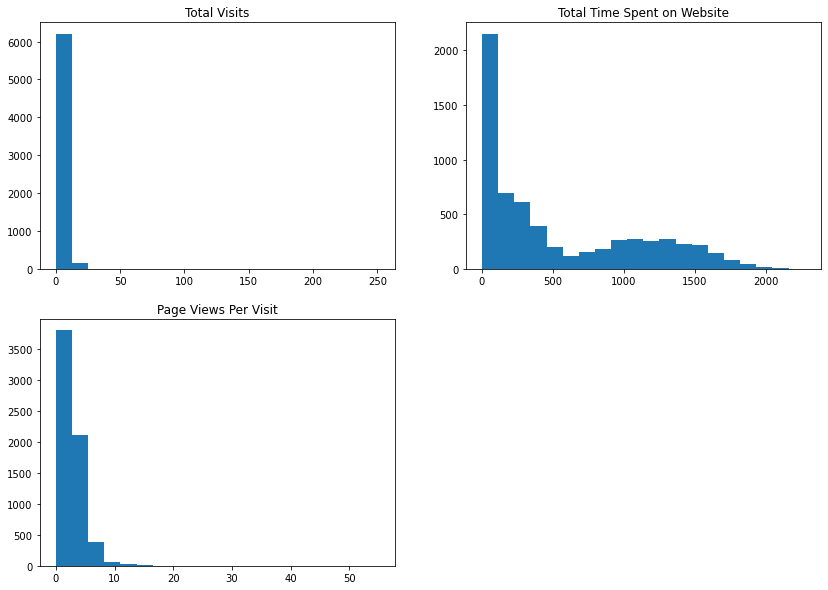

In [33]:
# For Numerical Columns
fig=plt.figure(figsize=(14,10))

# Checking the Distribution of the Numerical columns
plt.subplot(2,2,1)
plt.hist(df.TotalVisits, bins=20)
plt.title('Total Visits')

plt.subplot(2,2,2)
plt.hist(df['Total Time Spent on Website'], bins=20)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(df['Page Views Per Visit'], bins=20)
plt.title('Page Views Per Visit')

plt.show()

The graph has high peaks and skewed distribution. Let us plot Heatmap.

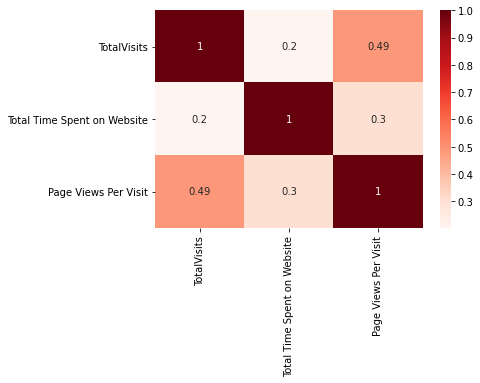

In [34]:
sns.heatmap(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(),cmap='Reds',annot=True)
plt.show()

No significant correlation between the columns so that the columns can dropped. Totalvisits and Page Views Per Visit has the highest correlation with 0.49.

Checking for Outliers

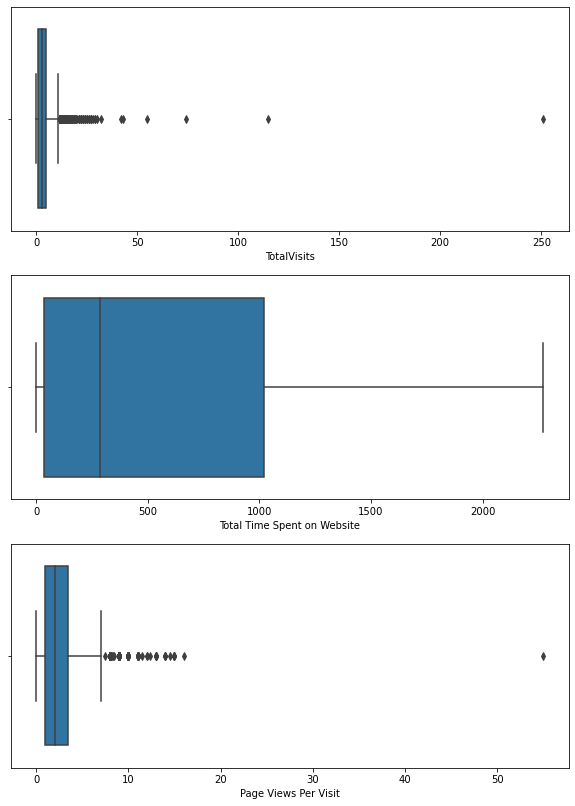

In [35]:
plt.figure(figsize=(10,14))

plt.subplot(3,1,1)
sns.boxplot(df.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(df['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(df['Page Views Per Visit'])

plt.show()

From the boxplot, it is clear that 'TotalVisits' and 'Page Views Per Visit' columns have outliers.
##### Outlier Treatment

In [36]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.480935,3.624196,535.224541,2.480464
std,0.499676,5.048555,565.374753,2.167364
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000
50%,0.000000,3.000000,287.000000,2.000000
75%,1.000000,5.000000,1022.000000,3.500000
90%,1.000000,8.000000,1428.800000,5.000000
95%,1.000000,10.000000,1592.400000,6.000000
99%,1.000000,18.000000,1849.280000,9.000000


In [37]:
# Capping at 99 percentile
df.TotalVisits.loc[df.TotalVisits >= df.TotalVisits.quantile(0.99)] = df.TotalVisits.quantile(0.99)
df['Page Views Per Visit'].loc[df['Page Views Per Visit'] >= df['Page Views Per Visit'].quantile(0.99)] = df['Page Views Per Visit'].quantile(0.99)

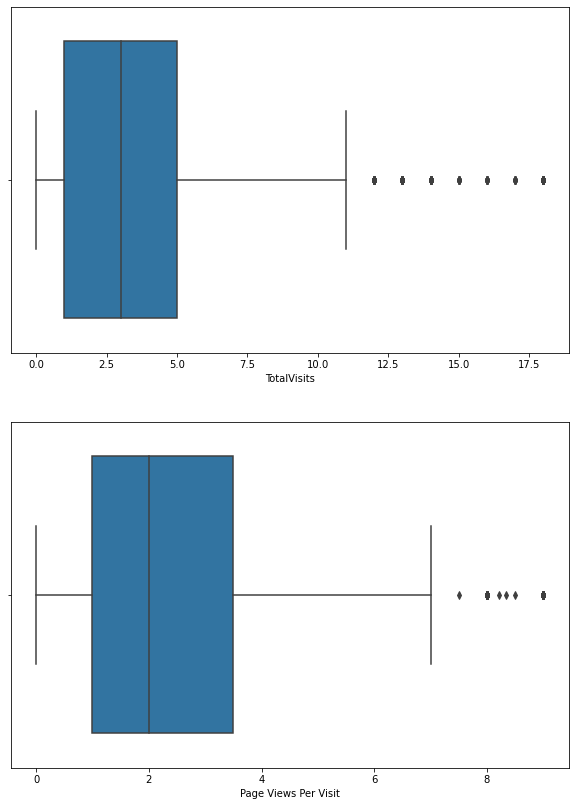

In [38]:
plt.figure(figsize=(10,14))

plt.subplot(2,1,1)
sns.boxplot(df.TotalVisits)

plt.subplot(2,1,2)
sns.boxplot(df['Page Views Per Visit'])

plt.show()

As we can see, we significantly reduced the Number of Outliers by capping.

#### Preparing Data for Modelling

#### Dummy Variable creation

In [39]:
# Columns which are categorical
catcols = df.loc[:,df.dtypes=='object']
catcols.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
# Creating dummy variables using the 'get_dummies'.
dummy_df = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)
df=pd.concat([df,dummy_df], axis=1)

In [41]:
# For 'Specialization' column. (Since it has 'Select' as its value which is useless, we need to drop that level explicitely.)
dummy_specialization = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
dummy_specialization = dummy_specialization.drop(['Specialization_Select'], 1)
df = pd.concat([df, dummy_specialization], axis=1)

In [42]:
# Dropping the original variables for which dummy variables have been created
df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [43]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Test Train Split

In [44]:
# Import Library
from sklearn.model_selection import train_test_split

In [45]:
# Dividing X and Y
X = df.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
# Splitting the Dataset into 70% Train and 30% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling

There are few numerical varibles which are at different scales. Let us Scale these variables.

In [48]:
# Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.222222,0.029489,0.222222,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.222222,0.082306,0.444444,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.333333,0.034331,0.666667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Correlation

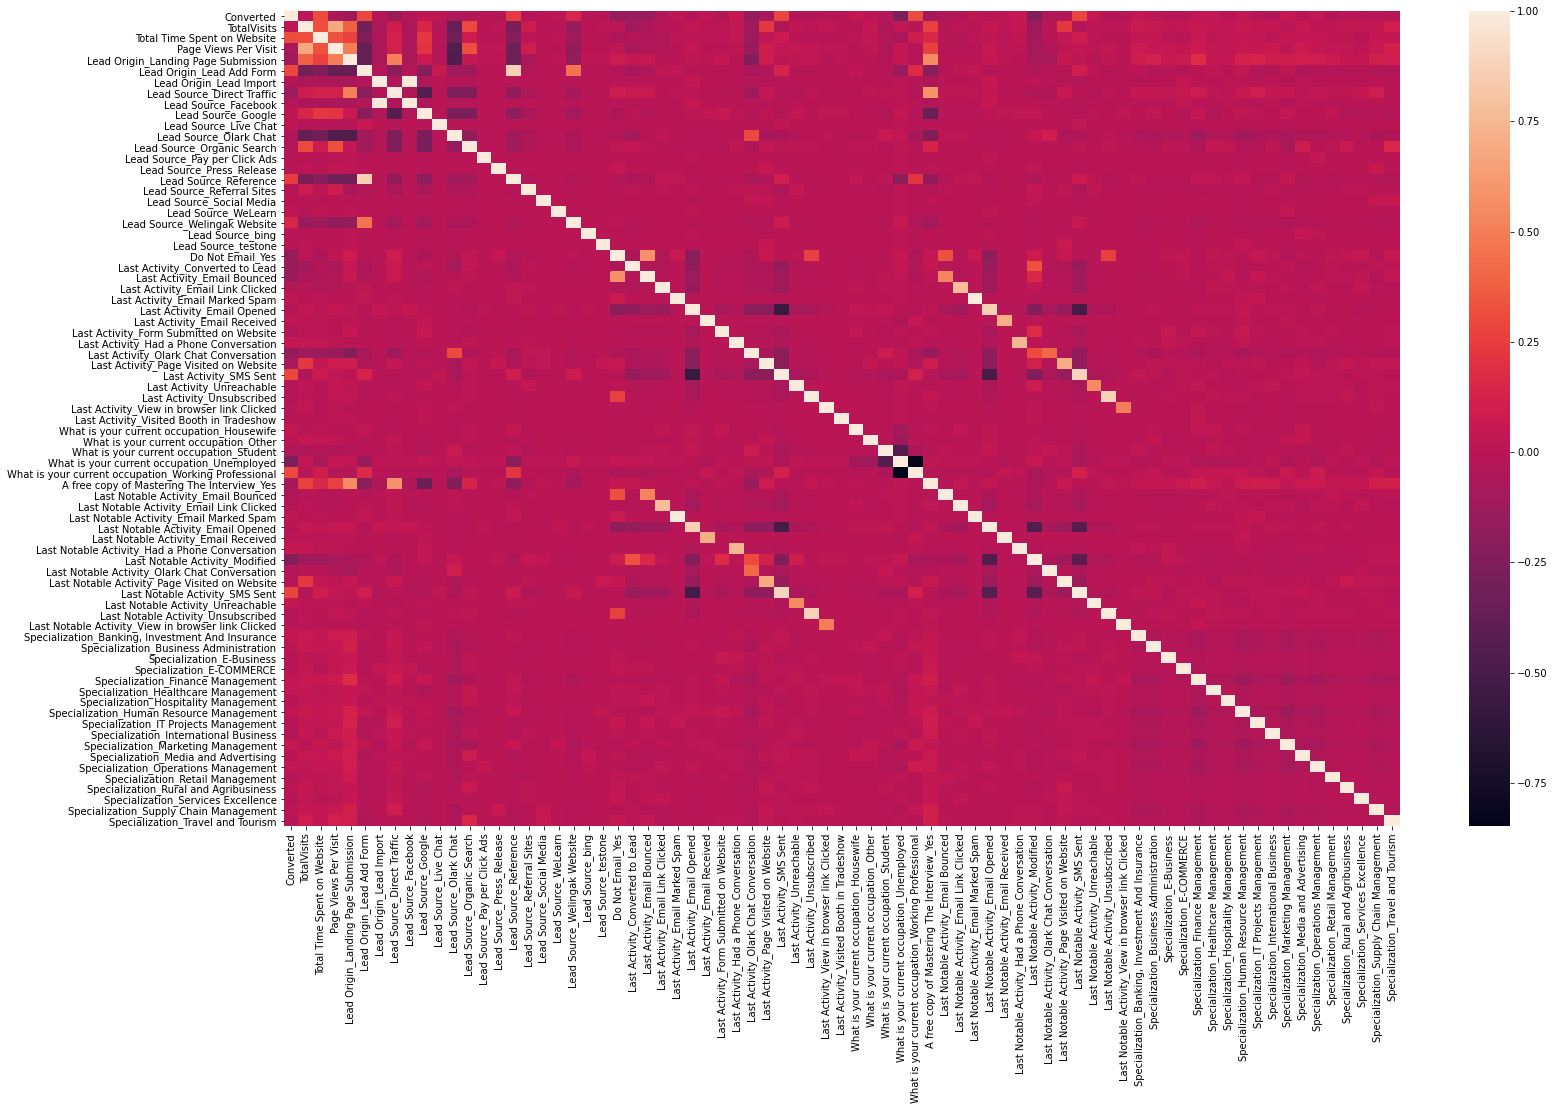

In [50]:
# Looking at the correlation table
plt.figure(figsize=(25,15))
sns.heatmap(df.corr())
plt.show()

### Model Building

Let us move to the Model Building part. Since there are lot of variables we can use RFE to select the feature variables.

In [51]:
# Import LogisticRegression and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [52]:
# Using RFE and selecting 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)     # with 15 variables
rfe = rfe.fit(X_train, y_train)

In [53]:
# Variables selected by RFE
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 56),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 30),
 ('Lead Source_testone', False, 39),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 9),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link Cl

In [54]:
# Storing all the columns selected by RFE in 'col' variable
col = X_train.columns[rfe.support_]

Since we have the variables selected by RFE, let us first build a model and check for the statistical significance of the Model.

In [55]:
# Selecting only the columns selected by RFE
X_train = X_train[col]

In [56]:
# Importing libraries
import statsmodels.api as sm

In [57]:
# Creating a Model after adding the constant and output the summary
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.5
Date:                Tue, 08 Feb 2022   Deviance:                       4139.0
Time:                        23:41:34   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2001      0.599     -2.002      0.045      -2.375      -0.025
TotalVisits                                              1.3087      0.239      5.471      0.000       0.840       1.777
Total Time Spent on Website                              4.4081      0.185     23.780      0.000       4.045       4.771
Lead Origin_Lead Add Form                                3.0603      1.192      2.567      0.010       0.724       5.397
Lead Source_Olark Chat                                   1.5612      0.127     12.319      0.000       1.313       1.810
Lead Source_Reference                                    1.2977      1.215      1.069      0.285      -1.083       3.678
Lead Source_Welingak Website                             3.4117      1.558      2.189      0.029       0.357       6.466
Do Not Email_Yes                                        -1.4797      0.193     -7.685      0.000      -1.857      -1.102
Last Activity_Had a Phone Conversation                   1.0130      0.985      1.028      0.304      -0.918       2.944
Last Activity_SMS Sent                                   1.1833      0.082     14.358      0.000       1.022       1.345
What is your current occupation_Housewife               22.7579   2.44e+04      0.001      0.999   -4.78e+04    4.79e+04
What is your current occupation_Student                 -1.0714      0.628     -1.706      0.088      -2.302       0.159
What is your current occupation_Unemployed              -1.2586      0.591     -2.128      0.033      -2.418      -0.099
What is your current occupation_Working Professional     1.3533      0.621      2.180      0.029       0.137       2.570
Last Notable Activity_Had a Phone Conversation          23.1392   2.09e+04      0.001      0.999   -4.09e+04    4.09e+04
Last Notable Activity_Unreachable                        2.7877      0.808      3.451      0.001       1.205       4.371
========================================================================================================================
"""

There are few variables with p-values greater than 0.05. First let us look at the VIFs.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Making VIF dataframe for all the variables selected
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.256148
4,Lead Source_Reference,65.186005
5,Lead Source_Welingak Website,20.026772
11,What is your current occupation_Unemployed,4.710057
0,TotalVisits,2.826595
7,Last Activity_Had a Phone Conversation,2.438696
13,Last Notable Activity_Had a Phone Conversation,2.432940
1,Total Time Spent on Website,2.408477
12,What is your current occupation_Working Profes...,1.703318
8,Last Activity_SMS Sent,1.593615


VIFs are very high for 3 variables. Let us first remove 'Lead Source_Reference' column as it has high p-value as well as high VIF.

In [60]:
X_train.drop('Lead Source_Reference', axis=1, inplace=True)

In [61]:
# Refitting the model with new set of features
logm2 = sm.GLM(y_train, (sm.add_constant(X_train)), family= sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.0
Date:                Tue, 08 Feb 2022   Deviance:                       4140.0
Time:                        23:41:34   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1997      0.599     -2.002      0.045      -2.374      -0.025
TotalVisits                                              1.3086      0.239      5.471      0.000       0.840       1.777
Total Time Spent on Website                              4.4081      0.185     23.779      0.000       4.045       4.771
Lead Origin_Lead Add Form                                4.3188      0.261     16.546      0.000       3.807       4.830
Lead Source_Olark Chat                                   1.5611      0.127     12.318      0.000       1.313       1.810
Lead Source_Welingak Website                             2.1531      1.037      2.077      0.038       0.121       4.185
Do Not Email_Yes                                        -1.4780      0.192     -7.683      0.000      -1.855      -1.101
Last Activity_Had a Phone Conversation                   1.0131      0.985      1.028      0.304      -0.918       2.944
Last Activity_SMS Sent                                   1.1833      0.082     14.358      0.000       1.022       1.345
What is your current occupation_Housewife               22.7597   2.44e+04      0.001      0.999   -4.79e+04    4.79e+04
What is your current occupation_Student                 -1.0707      0.628     -1.706      0.088      -2.301       0.160
What is your current occupation_Unemployed              -1.2592      0.591     -2.129      0.033      -2.418      -0.100
What is your current occupation_Working Professional     1.3537      0.621      2.181      0.029       0.137       2.570
Last Notable Activity_Had a Phone Conversation          23.1394   2.09e+04      0.001      0.999   -4.09e+04    4.09e+04
Last Notable Activity_Unreachable                        2.7881      0.808      3.452      0.001       1.205       4.371
========================================================================================================================
"""

Let us look at the VIFs.

In [62]:
# Making VIF dataframe for all the variables selected
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.709040
0,TotalVisits,2.826395
6,Last Activity_Had a Phone Conversation,2.438695
12,Last Notable Activity_Had a Phone Conversation,2.432937
1,Total Time Spent on Website,2.406889
2,Lead Origin_Lead Add Form,1.811002
11,What is your current occupation_Working Profes...,1.700074
7,Last Activity_SMS Sent,1.593533
3,Lead Source_Olark Chat,1.570391
4,Lead Source_Welingak Website,1.325647


So, VIFs are all less than 5. Let us first drop the column with high p-value i.e, 'Last Notable Activity_Had a Phone Conversation'.

In [63]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace=True)

In [64]:
# Refitting the model with new set of features
logm3 = sm.GLM(y_train, (sm.add_constant(X_train)), family= sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 08 Feb 2022   Deviance:                       4145.5
Time:                        23:41:35   Pearson chi2:                 4.83e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2018      0.599     -2.006      0.045      -2.376      -0.027
TotalVisits                                              1.3189      0.239      5.524      0.000       0.851       1.787
Total Time Spent on Website                              4.4009      0.185     23.756      0.000       4.038       4.764
Lead Origin_Lead Add Form                                4.3192      0.261     16.549      0.000       3.808       4.831
Lead Source_Olark Chat                                   1.5615      0.127     12.325      0.000       1.313       1.810
Lead Source_Welingak Website                             2.1530      1.037      2.077      0.038       0.121       4.185
Do Not Email_Yes                                        -1.4780      0.192     -7.684      0.000      -1.855      -1.101
Last Activity_Had a Phone Conversation                   2.6837      0.804      3.339      0.001       1.109       4.259
Last Activity_SMS Sent                                   1.1832      0.082     14.361      0.000       1.022       1.345
What is your current occupation_Housewife               21.7614   1.48e+04      0.001      0.999    -2.9e+04    2.91e+04
What is your current occupation_Student                 -1.0688      0.628     -1.703      0.089      -2.299       0.161
What is your current occupation_Unemployed              -1.2574      0.591     -2.127      0.033      -2.416      -0.099
What is your current occupation_Working Professional     1.3534      0.620      2.181      0.029       0.137       2.569
Last Notable Activity_Unreachable                        2.7872      0.808      3.451      0.001       1.204       4.370
========================================================================================================================
"""

The p-value of 'What is your current occupation_Housewife' column is increased. Let us look at the VIFs before dropping that column.

In [65]:
# Making VIF dataframe for all the variables selected
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.707604
0,TotalVisits,2.822691
1,Total Time Spent on Website,2.406577
2,Lead Origin_Lead Add Form,1.810686
11,What is your current occupation_Working Profes...,1.698937
7,Last Activity_SMS Sent,1.593509
3,Lead Source_Olark Chat,1.569890
4,Lead Source_Welingak Website,1.325635
9,What is your current occupation_Student,1.123687
5,Do Not Email_Yes,1.084996


VIFs looks the same. So let us drop column 'What is your current occupation_Housewife'.

In [66]:
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [67]:
# Refitting the model with new set of features
logm4 = sm.GLM(y_train, (sm.add_constant(X_train)), family= sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2075.2
Date:                Tue, 08 Feb 2022   Deviance:                       4150.3
Time:                        23:41:35   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6156      0.555     -1.110      0.267      -1.703       0.471
TotalVisits                                              1.2974      0.239      5.436      0.000       0.830       1.765
Total Time Spent on Website                              4.3984      0.185     23.753      0.000       4.035       4.761
Lead Origin_Lead Add Form                                4.3147      0.261     16.538      0.000       3.803       4.826
Lead Source_Olark Chat                                   1.5544      0.127     12.281      0.000       1.306       1.803
Lead Source_Welingak Website                             2.1514      1.037      2.075      0.038       0.119       4.183
Do Not Email_Yes                                        -1.4810      0.193     -7.689      0.000      -1.858      -1.103
Last Activity_Had a Phone Conversation                   2.6853      0.803      3.342      0.001       1.111       4.260
Last Activity_SMS Sent                                   1.1828      0.082     14.358      0.000       1.021       1.344
What is your current occupation_Student                 -1.6486      0.587     -2.806      0.005      -2.800      -0.497
What is your current occupation_Unemployed              -1.8369      0.549     -3.349      0.001      -2.912      -0.762
What is your current occupation_Working Professional     0.7734      0.580      1.334      0.182      -0.363       1.910
Last Notable Activity_Unreachable                        2.7837      0.808      3.445      0.001       1.200       4.367
========================================================================================================================
"""

The p-value of 'What is your current occupation_Working Professional' column is a bit high. First let us look at the VIFs.

In [68]:
# Making VIF dataframe for all the variables selected
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,4.686470
0,TotalVisits,2.816972
1,Total Time Spent on Website,2.396963
2,Lead Origin_Lead Add Form,1.801384
10,What is your current occupation_Working Profes...,1.694232
7,Last Activity_SMS Sent,1.593374
3,Lead Source_Olark Chat,1.566981
4,Lead Source_Welingak Website,1.325103
8,What is your current occupation_Student,1.122916
5,Do Not Email_Yes,1.084948


Let us drop the column 'What is your current occupation_Working Professional' as it is having high p-value.

In [69]:
X_train.drop('What is your current occupation_Working Professional', axis=1, inplace=True)

In [70]:
# Refitting the model with new set of features
logm5 = sm.GLM(y_train, (sm.add_constant(X_train)), family= sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.0
Date:                Tue, 08 Feb 2022   Deviance:                       4151.9
Time:                        23:41:36   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.0870      0.199      0.437      0.662      -0.303       0.477
TotalVisits                                    1.2858      0.239      5.386      0.000       0.818       1.754
Total Time Spent on Website                    4.3986      0.185     23.752      0.000       4.036       4.762
Lead Origin_Lead Add Form                      4.3131      0.261     16.535      0.000       3.802       4.824
Lead Source_Olark Chat                         1.5531      0.127     12.275      0.000       1.305       1.801
Lead Source_Welingak Website                   2.1499      1.037      2.074      0.038       0.118       4.182
Do Not Email_Yes                              -1.4785      0.193     -7.679      0.000      -1.856      -1.101
Last Activity_Had a Phone Conversation         2.6896      0.803      3.349      0.001       1.115       4.264
Last Activity_SMS Sent                         1.1862      0.082     14.419      0.000       1.025       1.347
What is your current occupation_Student       -2.3494      0.281     -8.350      0.000      -2.901      -1.798
What is your current occupation_Unemployed    -2.5381      0.186    -13.654      0.000      -2.902      -2.174
Last Notable Activity_Unreachable              2.7847      0.808      3.446      0.001       1.201       4.368
==============================================================================================================
"""

So, the p-value seems to be decent. Let us look at the VIFs.

In [71]:
# Making VIF dataframe for all the variables selected
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.341306
0,TotalVisits,2.461327
1,Total Time Spent on Website,2.116025
7,Last Activity_SMS Sent,1.514171
2,Lead Origin_Lead Add Form,1.479670
3,Lead Source_Olark Chat,1.391350
4,Lead Source_Welingak Website,1.304227
8,What is your current occupation_Student,1.080900
5,Do Not Email_Yes,1.078324
6,Last Activity_Had a Phone Conversation,1.008818


So, both p-value and VIFs seem decent. Let us go ahead and make predictions using the final set of features.

#### Model Evaluation

In [72]:
# Predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.299538
218     0.141438
4171    0.133362
4037    0.289443
3660    0.954705
207     0.197672
2044    0.169377
6411    0.949679
6498    0.073561
2085    0.982222
dtype: float64

In [73]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29953776, 0.14143793, 0.13336234, 0.28944289, 0.95470462,
       0.19767187, 0.16937746, 0.94967932, 0.07356082, 0.98222238])

In [74]:
# Creating a dataframe containing actual and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.299538
1,0,0.141438
2,1,0.133362
3,1,0.289443
4,1,0.954705


In [75]:
# Creating a new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.299538,0
1,0,0.141438,0
2,1,0.133362,0
3,1,0.289443,0
4,1,0.954705,1


Let us create the confusion matrix.

In [76]:
# Import libraries
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[1921  391]
 [ 568 1581]]


In [77]:
# Let us check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7850257789733244


In [78]:
# Let us evaluate the other metrics as well
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [79]:
# Sensitivity
TP/(TP+FN)

0.7356910190786412

In [80]:
# Specificity
TN/(TN+FP)

0.8308823529411765

##### Finding the Optimal Cutoff

In [81]:
# 0.5 was just an arbitrary value. Plotting ROC curve to get the AUC for the Threshold value 0.5.
def draw_roc(actual, probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Lead Scoring example')
    plt.legend(loc="lower right")
    plt.show()

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate=False)

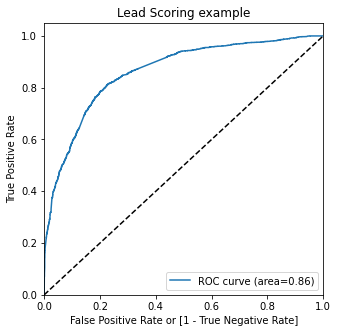

In [83]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)

The area under the curve is 0.86 which is good. So it seems a good model.
Let us check the sensitivity-specificity tradeoff to find the optimal cutoff.

In [84]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for num in numbers:
    y_train_pred_final[num] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>num else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.299538,0,1,1,1,0,0,0,0,0,0,0
1,0,0.141438,0,1,1,0,0,0,0,0,0,0,0
2,1,0.133362,0,1,1,0,0,0,0,0,0,0,0
3,1,0.289443,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954705,1,1,1,1,1,1,1,1,1,1,1


Let us create a dataframe to see the sensitivity, specificity values at different probability cutoffs

In [85]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    cm1=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.533737  0.992089  0.107699
0.2   0.2  0.697826  0.945091  0.467993
0.3   0.3  0.768213  0.867846  0.675606
0.4   0.4  0.791751  0.809214  0.775519
0.5   0.5  0.785026  0.735691  0.830882
0.6   0.6  0.759695  0.626803  0.883218
0.7   0.7  0.737054  0.543509  0.916955
0.8   0.8  0.710827  0.453234  0.950260
0.9   0.9  0.644474  0.281061  0.982266


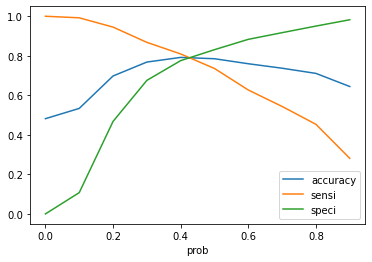

In [86]:
# Plotting the above result
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

So, by the graph it is clear that, the optimal cutoff value is around 0.42. Let us consider this as our threshold value.

In [87]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.299538,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.141438,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.133362,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.289443,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954705,1,1,1,1,1,1,1,1,1,1,1,1


In [88]:
# Let us check the accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7901815736381977


In [89]:
# Creating Confusion matrix for the new threshold
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion2)

[[1822  490]
 [ 446 1703]]


In [90]:
# Let us evaluate the other metrics as well
TP = confusion2[1,1] # True Positive
TN = confusion2[0,0] # True Negative
FP = confusion2[0,1] # False Positive
FN = confusion2[1,0] # False Negative

In [91]:
# Sensitivity
TP/(TP+FN)

0.7924616100511866

In [92]:
# Specificity
TN/(TN+FP)

0.7880622837370242

In [93]:
# Precision
TP/(TP+FP)

0.7765617875056999

In [94]:
# Recall
TP/(TP+FN)

0.7924616100511866

The cutoff point or threshold value is good to go.

##### Making predictions on Test Set

In [95]:
# Scaling the Test set using transform
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [96]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.388889,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.222222,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.166667,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.444444,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [97]:
# Adding Constant
X_test_sm = sm.add_constant(X_test[col])

In [98]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.388889,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.222222,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.166667,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.444444,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.166667,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.166667,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.777778,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.166667,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [99]:
# Dropping the columns to match the X_train dataset columns
X_test.drop(['Lead Source_Reference','Last Notable Activity_Had a Phone Conversation','What is your current occupation_Housewife','What is your current occupation_Working Professional'], 1, inplace=True)

In [100]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [101]:
y_test_pred[:10]

4771    0.996265
6122    0.139033
9202    0.701441
6570    0.296873
2668    0.739822
4233    0.793770
3368    0.688509
9091    0.495150
5972    0.271592
3631    0.788628
dtype: float64

In [102]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4771,0.996265
6122,0.139033
9202,0.701441
6570,0.296873
2668,0.739822


In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [104]:
# Removing the Index of both dataframe to concatinating it side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [105]:
# Concatinating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1], axis=1)

In [106]:
y_pred_final.head()

,Converted,0
0,1,0.996265
1,0,0.139033
2,0,0.701441
3,1,0.296873
4,1,0.739822


In [107]:
#Renaming Column
y_pred_final = y_pred_final.rename(columns={0:'Conversion_Prob'})

In [108]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996265
1,0,0.139033
2,0,0.701441
3,1,0.296873
4,1,0.739822


In [109]:
# Make Predictions on Test set using 0.42 as Threshold value
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x> 0.42 else 0)

In [110]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996265,1
1,0,0.139033,0
2,0,0.701441,1
3,1,0.296873,0
4,1,0.739822,1


In [111]:
# Checking the Overall Accuracy
metrics.accuracy_score(y_pred_final['Converted'],y_pred_final.final_predicted)

0.7860878661087866

In [112]:
# Creating Confusion matrix for the test set
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
print(confusion3)

[[784 212]
 [197 719]]


In [113]:
# Let us evaluate the other metrics as well
TP = confusion3[1,1] # True Positive
TN = confusion3[0,0] # True Negative
FP = confusion3[0,1] # False Positive
FN = confusion3[1,0] # False Negative

In [114]:
# Sensitivity
TP/(TP+FN)

0.7849344978165939

In [115]:
# Specificity
TN/(TN+FP)

0.7871485943775101

In [116]:
# Precision
TP/(TP+FP)

0.7722878625134264

In [117]:
# Recall
TP/(TP+FN)

0.7849344978165939

So, the final Model has:
    On Train Data - the Accuracy of 79%, Sensitivity/Recall of 79%, Specificity of 79%, Precision of 78%.
    On Test Data - the Accuracy of 79%, Sensitivity/Recall of 79%, Specificity of 79%, Precision of 77%.